In [173]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')
import dateutil

from sklearn.preprocessing import StandardScaler

In [127]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic =     [1076, 1082, 1101]
impaired =     [1060, 1062, 1074, 1092, 1102]
normal =       [1091, 1093]
animal_tol = {
    1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
    1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='FBG|RBG').columns
fbg_cols = data.filter(regex='FBG').columns
rbg_cols = data.filter(regex='RBG').columns
pval_cols = data.filter(regex='pval').columns

n = data.filter(regex='1091|1093')                 # normal
i = data.filter(regex='1060|1062|1074|1092|1102')  # impaired
d = data.filter(regex='1076|1082|1101')            # diabetic

f = data[fbg_cols]  # fasted
r = data[rbg_cols]  # random-fed

fn = n.filter(fbg_cols)  # fasted normal 
fi = i.filter(fbg_cols)  # fasted impaired
fd = d.filter(fbg_cols)  # fasted diabetic

rn = n.filter(rbg_cols)  # random normal
ri = i.filter(rbg_cols)  # random impaired
rd = d.filter(rbg_cols)  # random diabetic

# rename columns to remove '_RBG', '_FBG' for element-wise subtraction
# rn.columns = rn.columns.str[:-4]
# fn.columns = fn.columns.str[:-4]
# ri.columns = ri.columns.str[:-4]
# fi.columns = fi.columns.str[:-4]
# rd.columns = rd.columns.str[:-4]
# fd.columns = fd.columns.str[:-4]

qval_sampling = data['fdr corrected pval effect of sampling']
qval_gtol = data['fdr corrected pval effect of glucose tolerance']
qval_cross = data['fdr corrected pval effect of interaction sampling and glucose tolerance']

## Make df with 20 groups, averaging within each week's sampling type

In [4]:
order_cols = rn.columns.to_list() + fn.columns.to_list() + \
                ri.columns.to_list() + fi.columns.to_list() + \
                rd.columns.to_list() + fd.columns.to_list()

# Standardize data
data.loc[:, data_cols] = StandardScaler().fit_transform(data.loc[:, data_cols])
# data.loc[:, data_cols]

# Make file grouping - Heat Map File Grouping
hmfg = fg.set_index('combined_col_name')[['animal', 'bg_type']].T
# Make another file grouping
hmfg2 = fg[['animal', 'bg_type', 'gluc_tol']].drop_duplicates().set_index(['bg_type', 'animal'])

d = data.loc[:, order_cols].append(hmfg).T
d = d.groupby(['bg_type', 'animal']).mean()
d = d.join(hmfg2)

# Set metadata as indexes
d.set_index('gluc_tol', append=True, inplace=True)
d.sort_values(['bg_type', 'gluc_tol', 'animal'], ascending=[True, False, True], inplace=True)
d

l_0       l_1       l_2       l_3       l_4  \
bg_type animal gluc_tol                                                     
FBG     1091   normal    0.658193  0.944542  0.718667  1.972213  0.072298   
        1093   normal    0.582896  1.088961  0.595267  1.983369  0.257411   
        1060   impaired  0.627583  1.177346  0.745092  2.021367  0.467008   
        1062   impaired  0.517778  0.992269  0.571426  1.966271  0.267027   
        1074   impaired  0.420240  0.890599  0.726746  2.090372  0.179301   
        1092   impaired  0.521512  1.083607  0.619972  1.991530  0.273998   
        1102   impaired  0.549985  1.088480  0.698838  1.882185  0.255397   
        1076   diabetic  0.263949  0.615316  0.430176  1.650632 -0.224592   
        1082   diabetic  0.649759  1.178083  0.880686  2.024017  0.244519   
        1101   diabetic  0.531250  1.107757  0.756140  1.986287  0.348034   
RBG     1091   normal    0.887272  1.247744  0.688818  2.160258  0.350685   
        1093   normal    0.688521  1.064403  0.821354  2.009488  0.355518   
        1060   impaired  0.725860  1.206625  0.813709  1.947588  0.444065   
        1062   impaired  0.403773  0.579232  0.637179  2.021118  0.270295   
        1074   impaired  0.748465  1.193252  0.817260  2.133756  0.481352   
        1092   impaired  0.828251  1.204344  0.867798  2.053171  0.266172   
        1102   impaired  0.473955  0.674217  0.556168  1.955514  0.134988   
        1076   diabetic  0.503930  0.767384  0.796187  1.871793  0.301450   
        1082   diabetic  0.505727  0.876875  0.596706  1.971974  0.208802   
        1101   diabetic  0.600213  1.072227  0.677169  2.120861  0.275077   

                              l_5       l_6       l_7       l_8       l_9  \
bg_type animal gluc_tol                                                     
FBG     1091   normal    1.732007  3.290954  0.195351  1.716719  0.922611   
        1093   normal    1.820602  3.192389  0.182152  1.571707  0.705476   
        1060   impaired  1.949313  3.329612  0.172992  1.645939  0.827470   
        1062   impaired  1.650971  3.199877  0.081931  1.571126  0.628333   
        1074   impaired  1.745678  3.290150  0.154130  1.645689  0.720403   
        1092   impaired  1.828682  3.159777  0.153252  1.551269  0.651968   
        1102   impaired  1.839403  3.330699 -0.164134  1.612565  0.572181   
        1076   diabetic  1.474347  3.043705 -0.247896  1.431097  0.346336   
        1082   diabetic  1.816268  3.218756  0.282643  1.674557  0.865110   
        1101   diabetic  1.899387  3.182927  0.085577  1.566378  0.746925   
RBG     1091   normal    1.800076  3.193886  0.233039  1.625315  0.645788   
        1093   normal    1.742154  3.093593  0.129437  1.504082  0.624608   
        1060   impaired  1.797370  3.373536  0.019501  1.648350  0.628866   
        1062   impaired  1.457778  3.175050  0.066305  1.561007  0.514992   
        1074   impaired  1.891247  3.274192  0.093073  1.611810  0.691187   
        1092   impaired  1.876388  3.211296  0.179391  1.634891  0.766959   
        1102   impaired  1.666232  3.027925 -0.027558  1.379658  0.305270   
        1076   diabetic  1.740561  3.150770 -0.114839  1.559948  0.600895   
        1082   diabetic  1.614873  3.145254 -0.106932  1.443070  0.303848   
        1101   diabetic  1.786211  3.139131  0.187285  1.534844  0.460442   

                         ...     m_682     m_368     m_340     m_616  \
bg_type animal gluc_tol  ...                                           
FBG     1091   normal    ... -0.539483  0.410606  0.453191 -0.472971   
        1093   normal    ... -0.651428  0.308930  0.339819 -0.754844   
        1060   impaired  ... -0.727322  0.196547  0.218683 -1.007176   
        1062   impaired  ... -0.864268  0.165062  0.180189 -1.032448   
        1074   impaired  ... -0.540860  0.349850  0.403390 -0.795858   
        1092   impaired  ... -0.690295  0.278217  0.291666 -0.827747   
        1102   impaired  ... -0.733837  0.220646  0.275036 -1.08

## Make row colors

In [23]:
lm_class = data.loc[:, ['Compound Class', 'Type']]
lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(colors)
lm_class.loc[:, 'type_color'] = lm_class['Type'].map(colors)
lm_class.loc[:, 'superclass_color'] = lm_class['d'].str['color']
lm_class.loc[:, 'superclass'] = lm_class['d'].str['superclass']
lm_class.drop('d', inplace=True, axis=1)
lm_class

,Compound Class,Type,type_color,superclass_color,superclass
i,,,,,
l_0,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_1,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_2,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_3,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_4,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
...,...,...,...,...,...
m_169,unknown,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_213,unknown,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_24,CA,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.5490196078431373, 0.33725490196078434, 0.29...",Carboxylic Acid


## Make column colors 

In [56]:
bg_type_color = []
gluc_tol_color = []
for bg, animal, gluc_tol in d.index:
    bg_type_color.append(colors[bg])
    gluc_tol_color.append(colors[gluc_tol])
col_colors = [bg_type_color, gluc_tol_color]

Text(0.5, 1.0, 'Heatmap')

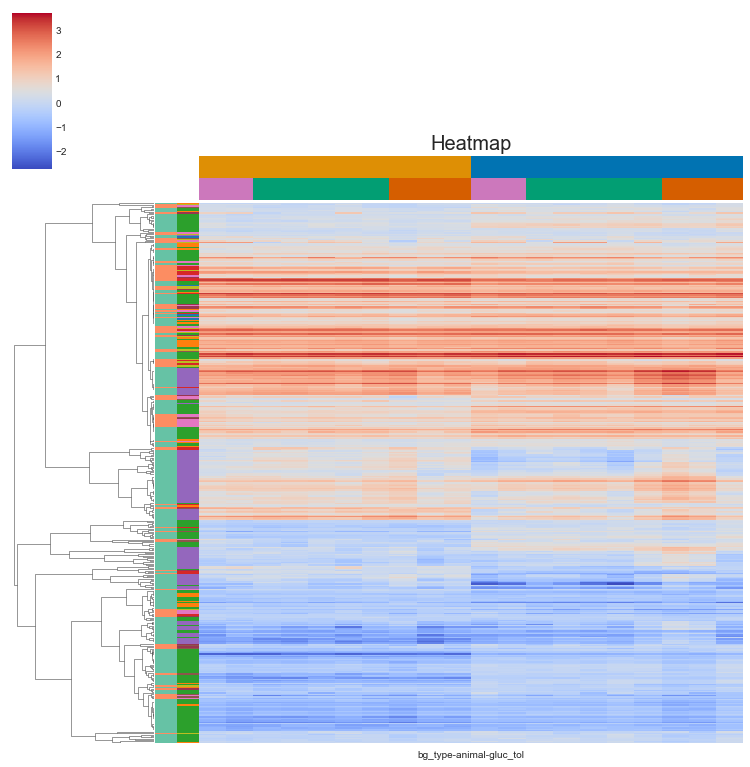

In [86]:
no_unknowns = data['Proposed ID'] != 'unknown'
signif_sampling = data['fdr corrected pval effect of sampling'] < 0.05
quick_render_test = data['RT [min]'] < 0.6
all_features = pd.Series([True] * len(d))

# Set features to be used
features = no_unknowns

fig = sns.clustermap(
    #                data=d.T, 
    #                row_colors=[lm_colormap, lm_class['color']],
    data=d.T[features],
    method='complete',
    metric='cosine',  # 'cosine', 'correlation'
#     z_score=1,
    row_colors=[lm_class.loc[features, 'type_color'], lm_class['superclass_color'][features]],
    #                data=d.T[quick_render_test],
    #                row_colors=[lm_colormap[quick_render_test], lm_class['color'][quick_render_test]],
    cmap='coolwarm',
    col_cluster=False,
    col_colors=col_colors,
    figsize=(11, 12),
)
cbar = fig.ax_cbar
hm = fig.ax_heatmap
dg = fig.ax_row_dendrogram
cc = fig.ax_col_colors
rc = fig.ax_row_colors

hm.set_yticklabels([])
hm.set_xticklabels([])

cc.set_title('Heatmap', fontsize=20)
# cc.legend()
# rc.legend()

# plt.savefig(r'..\reports\figures\4-3-2\RvF_metadata_heatmap.svg')

In [154]:
data.loc[data.index]

,Unique ID,Type,Proposed ID,Found in Tracefinder,Compound Class,m/z,RT [min],Area (Max.),Score,Adduct,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
i,,,,,,,,,,,,,,,,,,,,,
l_0,unknown_679.05463_0.536,lipid,unknown,NaN,unknown,679.05463,0.536,24.521584,NaN,NaN,...,22.462249,23.360916,22.399150,23.163419,22.737840,22.116533,23.352451,23.527438,23.858693,23.617549
l_1,unknown_641.1087_0.537,lipid,unknown,NaN,unknown,641.10870,0.537,25.718750,NaN,NaN,...,24.663849,23.700392,23.382317,24.385568,23.789670,22.248759,22.513249,24.558075,24.818525,24.575904
l_2,unknown_951.15973_0.541,lipid,unknown,NaN,unknown,951.15973,0.541,24.948650,NaN,NaN,...,23.452626,22.549975,23.249352,23.680978,23.989589,23.527507,24.002570,23.886203,24.069137,23.455789
l_3,unknown_329.03067_0.542,lipid,unknown,NaN,unknown,329.03067,0.542,28.102881,NaN,NaN,...,27.210668,26.194952,26.911119,26.805997,26.145097,26.638404,27.217392,26.970428,27.175265,26.482705
l_4,unknown_969.13147_0.544,lipid,unknown,NaN,unknown,969.13147,0.544,24.016735,NaN,NaN,...,22.602208,21.905509,22.226570,22.485669,22.208159,22.236114,23.151359,22.823820,21.750593,22.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_169,unknown_174.00102_9.94,metabolite,unknown,NaN,unknown,174.00102,9.940,25.488336,NaN,[M-H]-1,...,24.942889,24.895636,24.931289,25.067714,25.395219,24.788981,24.894367,25.168366,25.050323,24.771208
m_213,unknown_187.04097_9.971,metabolite,unknown,NaN,unknown,187.04097,9.971,25.075584,52.5,[M-H]-1,...,20.484062,23.047250,23.625874,20.663426,20.698623,20.921984,24.008593,22.538237,21.117720,18.221881
m_24,DL-Lactic Acid_89.02331_9.99,metabolite,DL-Lactic Acid,NaN,CA,89.02331,9.990,28.683584,99.9,[M-H]-1,...,27.236489,27.782425,27.946315,27.362929,27.223422,27.298238,28.052793,27.463850,27.304277,26.282341


In [174]:
lm_class

,Compound Class,Type,type_color,superclass_color,superclass
i,,,,,
l_0,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_1,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_2,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_3,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
l_4,unknown,lipid,"[0.4, 0.7607843137254902, 0.6470588235294118]","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
...,...,...,...,...,...
m_169,unknown,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_213,unknown,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.4980392156862745, 0.4980392156862745, 0.498...",Unidentified
m_24,CA,metabolite,"[0.9882352941176471, 0.5529411764705883, 0.384...","[0.5490196078431373, 0.33725490196078434, 0.29...",Carboxylic Acid


In [175]:
colors

{'lipid': [0.4, 0.7607843137254902, 0.6470588235294118],
 'metabolite': [0.9882352941176471, 0.5529411764705883, 0.3843137254901961],
 'FBG': [0.8705882352941177, 0.5607843137254902, 0.0196078431372549],
 'RBG': [0.00392156862745098, 0.45098039215686275, 0.6980392156862745],
 'normal': [0.8, 0.47058823529411764, 0.7372549019607844],
 'impaired': [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 'diabetic': [0.8352941176470589, 0.3686274509803922, 0.0],
 'Glycerolipid': [0.5803921568627451, 0.403921568627451, 0.7411764705882353],
 'Fatty Acyl': [0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
 'Sterol Lipid': [0.12156862745098039, 0.4666666666666667, 0.7058823529411765],
 'Sphingolipid': [1.0, 0.4980392156862745, 0.054901960784313725],
 'Phospholipid': [0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313],
 'Carboxylic Acid': [0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354],
 'Amino Acid': [0.8901960784313725, 0.466666666666666

In [260]:
animal_tol

{1076: 'diabetic',
 1082: 'diabetic',
 1101: 'diabetic',
 1060: 'impaired',
 1062: 'impaired',
 1074: 'impaired',
 1092: 'impaired',
 1102: 'impaired',
 1091: 'normal',
 1093: 'normal'}

[[0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.8, 0.47058823529411764, 0.7372549019607844],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.8, 0.47058823529411764, 0.7372549019607844],
 [0.8352941176470589, 0.3686274509803922, 0.0],
 [0.8, 0.47058823529411764, 0.7372549019607844],
 [0.8352941176470589, 0.3686274509803922, 0.0],
 [0.8, 0.47058823529411764, 0.7372549019607844],
 [0.8352941176470589, 0.3686274509803922, 0.0],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.8, 0.47058823529411764, 0.7372549019607844],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.8352941176470589, 0.3686274509803922, 0.0],
 [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 [0.00784313725490196, 0.6196078431372549, 

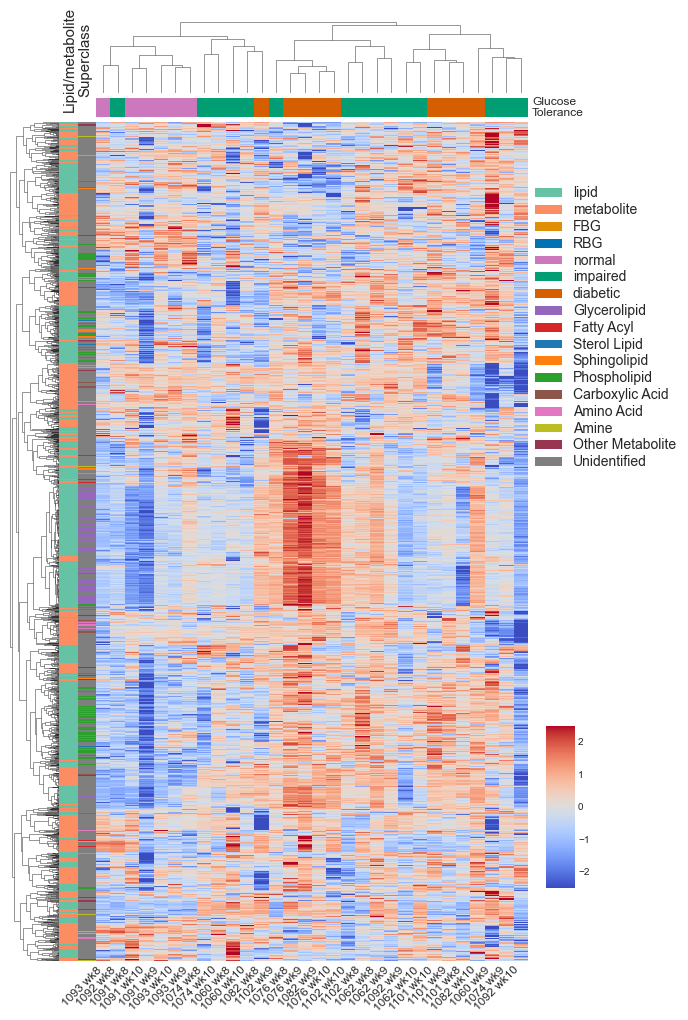

In [281]:
no_unknowns = data['Proposed ID'] != 'unknown'
features = data.index  # quick_render_test
cm = sns.clustermap(
    data=data.loc[features, rbg_cols],
    z_score=0,  # Z score the rows with 0 (because z-score columns makes columns look very homogeneous)
#     row_linkage=my_row_cluster,  
#     col_linkage=my_col_cluster,
    method='complete',     # complete, ward, single, average
    metric='correlation',  # cosine, correlation, euclidean
#     robust=True,
    vmin=-2.5, vmax=2.5,
    row_colors=[lm_class.loc[features, 'type_color'], lm_class['superclass_color'][features]],
    col_colors=[colors[animal_tol[int(animal[:4])]] for animal in data.loc[:, rbg_cols].columns],
    cmap='coolwarm',  # coolwarm turbo viridis seismic vlag VLAG IS GOOD twilight TWILIGHT IS GOOD
    col_cluster=True,
#     figsize=(11, 12),
    cbar_pos=(0.95, 0.18, 0.05, 0.15),
    dendrogram_ratio=(0.1, 0.08),
    colors_ratio=(0.035, 0.02),
)
fig = cm.fig
cbar = cm.ax_cbar
hm = cm.ax_heatmap
dg = cm.ax_row_dendrogram
cc = cm.ax_col_colors
rc = cm.ax_row_colors

fig.set_size_inches(8, 15)
fig.set_facecolor('white')

hm.set_yticklabels([])
xtl = hm.get_xticklabels()
new_xtl = [text.get_text()[:-4].replace('_', ' wk') for text in xtl]
hm.set_xticklabels(new_xtl, rotation=45, 
                   horizontalalignment='right', verticalalignment='top',
                   fontsize=12)
hm.set_ylabel('')
keys = list(colors.keys())
labels = [name for name in keys[:17]]
handles = [Patch(facecolor=colors[label]) for label in labels]
hm.legend(handles, labels, loc=(1, 0.58), fontsize=14, labelspacing=0.2)

rc.set_title('Lipid/metabolite\nSuperclass', 
             fontsize=15, rotation='vertical', 
#              loc=(0.5, 0.5),
             horizontalalignment='center', verticalalignment='bottom',
             pad=10)
cc.yaxis.set_label_position('right')
cc.set_ylabel('Glucose\nTolerance', 
#               loc='bottom',
              ha='left', va='center',
              rotation='horizontal', fontsize=12)
# cc.set_title('Heatmap', fontsize=20)
print('')

In [183]:
colors

{'lipid': [0.4, 0.7607843137254902, 0.6470588235294118],
 'metabolite': [0.9882352941176471, 0.5529411764705883, 0.3843137254901961],
 'FBG': [0.8705882352941177, 0.5607843137254902, 0.0196078431372549],
 'RBG': [0.00392156862745098, 0.45098039215686275, 0.6980392156862745],
 'normal': [0.8, 0.47058823529411764, 0.7372549019607844],
 'impaired': [0.00784313725490196, 0.6196078431372549, 0.45098039215686275],
 'diabetic': [0.8352941176470589, 0.3686274509803922, 0.0],
 'Glycerolipid': [0.5803921568627451, 0.403921568627451, 0.7411764705882353],
 'Fatty Acyl': [0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
 'Sterol Lipid': [0.12156862745098039, 0.4666666666666667, 0.7058823529411765],
 'Sphingolipid': [1.0, 0.4980392156862745, 0.054901960784313725],
 'Phospholipid': [0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313],
 'Carboxylic Acid': [0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354],
 'Amino Acid': [0.8901960784313725, 0.466666666666666